## Assignment is below at the bottom

Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [46]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import tensorflow as tf

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [47]:
# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [48]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 1), loss = 'binary_crossentropy')

In [49]:
autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/100
235/235 [==============================] - 3s 10ms/step - loss: 0.3725 - val_loss: 0.2644
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2598 - val_loss: 0.2566
Epoch 3/100
235/235 [==============================] - 3s 11ms/step - loss: 0.2538 - val_loss: 0.2526
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2516 - val_loss: 0.2515
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2507 - val_loss: 0.2512
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2500 - val_loss: 0.2510
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2474 - val_loss: 0.2437
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2405 - val_loss: 0.2383
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2365 - val_loss: 0.2346
Epoch 10/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2305 - v

235/235 [==============================] - 2s 10ms/step - loss: 0.1717 - val_loss: 0.1718
Epoch 81/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1716 - val_loss: 0.1727
Epoch 82/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1714 - val_loss: 0.1724
Epoch 83/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1712 - val_loss: 0.1728
Epoch 84/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1710 - val_loss: 0.1715
Epoch 85/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1709 - val_loss: 0.1724
Epoch 86/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1707 - val_loss: 0.1717
Epoch 87/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1705 - val_loss: 0.1716
Epoch 88/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1703 - val_loss: 0.1713
Epoch 89/100
235/235 [==============================] - 2s 11ms/step - loss: 0.1701 - v

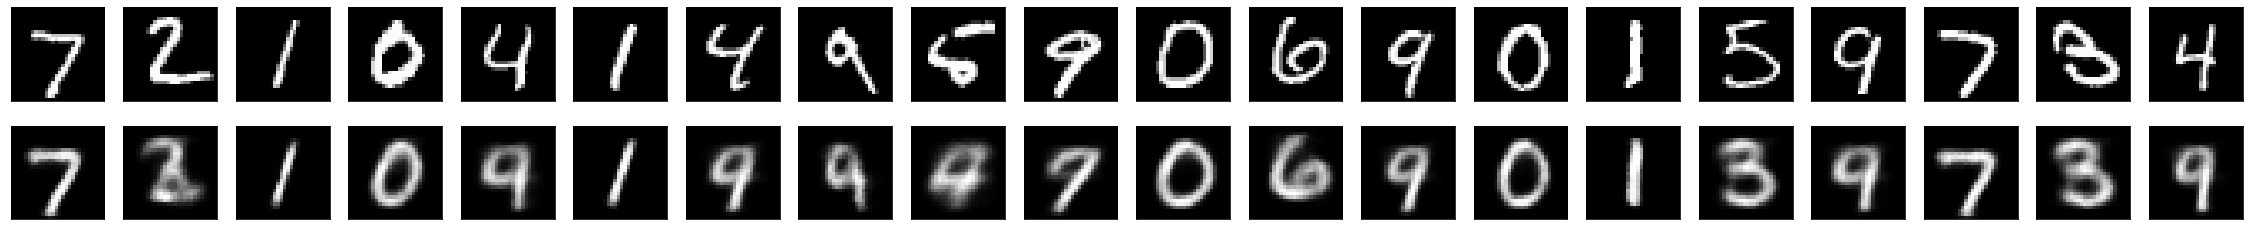

In [50]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [51]:
encoded_imgs

array([[ 7.219671 , 30.868376 , 21.55842  ,  0.       ],
       [13.385839 ,  8.703818 , 12.454264 ,  0.       ],
       [17.965294 , 19.518785 , 39.039093 ,  0.       ],
       ...,
       [ 5.9042044, 12.625751 , 14.847687 ,  0.       ],
       [ 2.6904387,  3.6062627,  9.06282  ,  0.       ],
       [21.825836 , 15.343994 , 11.226039 ,  0.       ]], dtype=float32)

In [52]:
noise = np.random.normal(20,4, (4,4))
noise_preds = decoder.predict(noise)

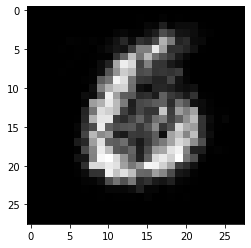

In [53]:
plt.imshow(noise_preds[1].reshape(28,28))

In [54]:
np.max(encoded_imgs)

50.92613

In [55]:
encoded_imgs

array([[ 7.219671 , 30.868376 , 21.55842  ,  0.       ],
       [13.385839 ,  8.703818 , 12.454264 ,  0.       ],
       [17.965294 , 19.518785 , 39.039093 ,  0.       ],
       ...,
       [ 5.9042044, 12.625751 , 14.847687 ,  0.       ],
       [ 2.6904387,  3.6062627,  9.06282  ,  0.       ],
       [21.825836 , 15.343994 , 11.226039 ,  0.       ]], dtype=float32)

In [56]:
%matplotlib inline

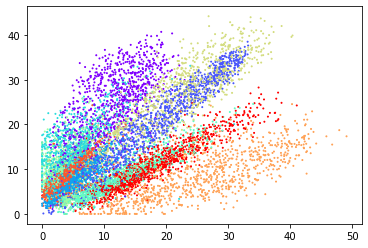

In [57]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()

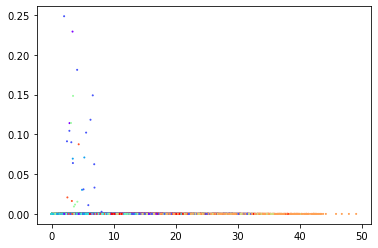

In [58]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

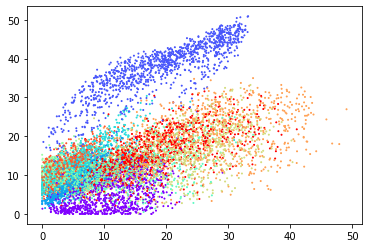

In [59]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
# plt.show()

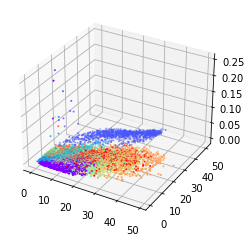

In [60]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

# Assignment


1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


Epoch 1/100
235/235 [==============================] - 3s 10ms/step - loss: 0.3434 - val_loss: 0.2638
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2588 - val_loss: 0.2546
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2487 - val_loss: 0.2428
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2403 - val_loss: 0.2390
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2376 - val_loss: 0.2373
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2361 - val_loss: 0.2348
Epoch 7/100
235/235 [==============================] - 2s 11ms/step - loss: 0.2347 - val_loss: 0.2335
Epoch 8/100
235/235 [==============================] - 3s 15ms/step - loss: 0.2332 - val_loss: 0.2324
Epoch 9/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2317 - val_loss: 0.2307
Epoch 10/100
235/235 [==============================] - 3s 12ms/step - loss: 0.2302

235/235 [==============================] - 4s 19ms/step - loss: 0.1942 - val_loss: 0.1950
Epoch 81/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1939 - val_loss: 0.1953
Epoch 82/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1937 - val_loss: 0.1959
Epoch 83/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1934 - val_loss: 0.1947
Epoch 84/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1932 - val_loss: 0.1949
Epoch 85/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1930 - val_loss: 0.1948
Epoch 86/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1927 - val_loss: 0.1943
Epoch 87/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1927 - val_loss: 0.1937
Epoch 88/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1923 - val_loss: 0.1945
Epoch 89/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1921 - 

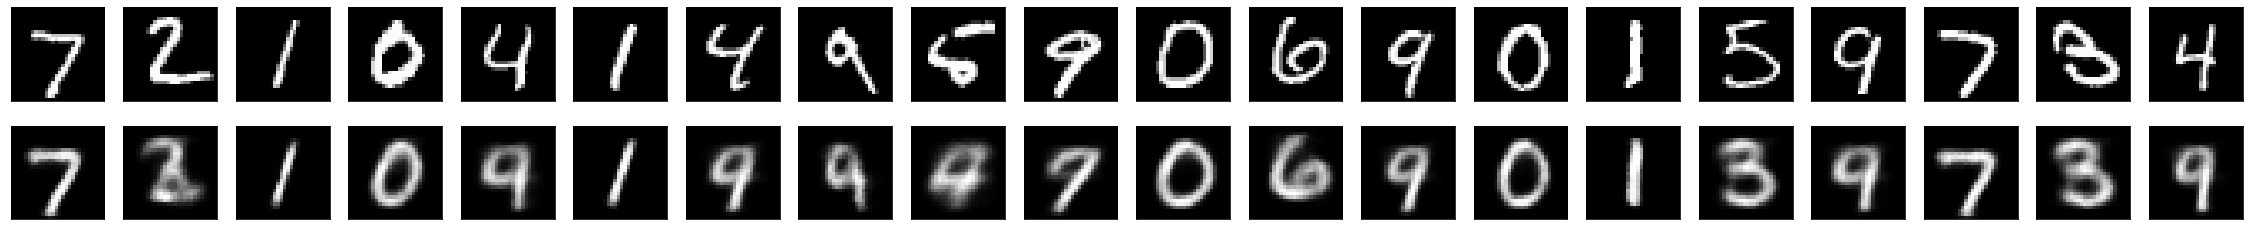

Epoch 1/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3597 - val_loss: 0.2647
Epoch 2/100
235/235 [==============================] - 4s 19ms/step - loss: 0.2589 - val_loss: 0.2543
Epoch 3/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2474 - val_loss: 0.2380
Epoch 4/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2298 - val_loss: 0.2231
Epoch 5/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2212 - val_loss: 0.2153
Epoch 6/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2113 - val_loss: 0.2059
Epoch 7/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2043 - val_loss: 0.2025
Epoch 8/100
235/235 [==============================] - 3s 12ms/step - loss: 0.2000 - val_loss: 0.1986
Epoch 9/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1960 - val_loss: 0.1934
Epoch 10/100
235/235 [==============================] - 3s 12ms/step - loss: 0.192

235/235 [==============================] - 3s 12ms/step - loss: 0.1555 - val_loss: 0.1558
Epoch 81/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1554 - val_loss: 0.1559
Epoch 82/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1552 - val_loss: 0.1564
Epoch 83/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1551 - val_loss: 0.1563
Epoch 84/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1549 - val_loss: 0.1554
Epoch 85/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1547 - val_loss: 0.1553
Epoch 86/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1546 - val_loss: 0.1555
Epoch 87/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1543 - val_loss: 0.1550
Epoch 88/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1543 - val_loss: 0.1551
Epoch 89/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1542 - 

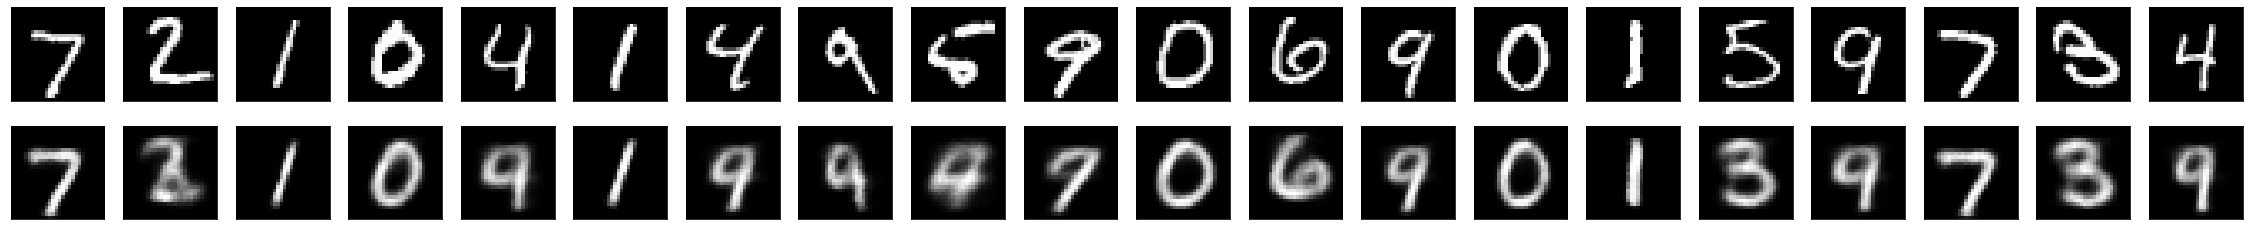

Epoch 1/100
235/235 [==============================] - 3s 13ms/step - loss: 0.3589 - val_loss: 0.2634
Epoch 2/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2568 - val_loss: 0.2509
Epoch 3/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2437 - val_loss: 0.2394
Epoch 4/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2345 - val_loss: 0.2261
Epoch 5/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2200 - val_loss: 0.2146
Epoch 6/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2125 - val_loss: 0.2086
Epoch 7/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2071 - val_loss: 0.2045
Epoch 8/100
235/235 [==============================] - 7s 29ms/step - loss: 0.2018 - val_loss: 0.1992
Epoch 9/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1975 - val_loss: 0.1957
Epoch 10/100
235/235 [==============================] - 3s 14ms/step - loss: 0.193

235/235 [==============================] - 3s 14ms/step - loss: 0.1463 - val_loss: 0.1463
Epoch 81/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1459 - val_loss: 0.1465
Epoch 82/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1459 - val_loss: 0.1462
Epoch 83/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1458 - val_loss: 0.1464
Epoch 84/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1456 - val_loss: 0.1467
Epoch 85/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1454 - val_loss: 0.1458
Epoch 86/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1452 - val_loss: 0.1464
Epoch 87/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1451 - val_loss: 0.1459
Epoch 88/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1450 - val_loss: 0.1446
Epoch 89/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1450 - 

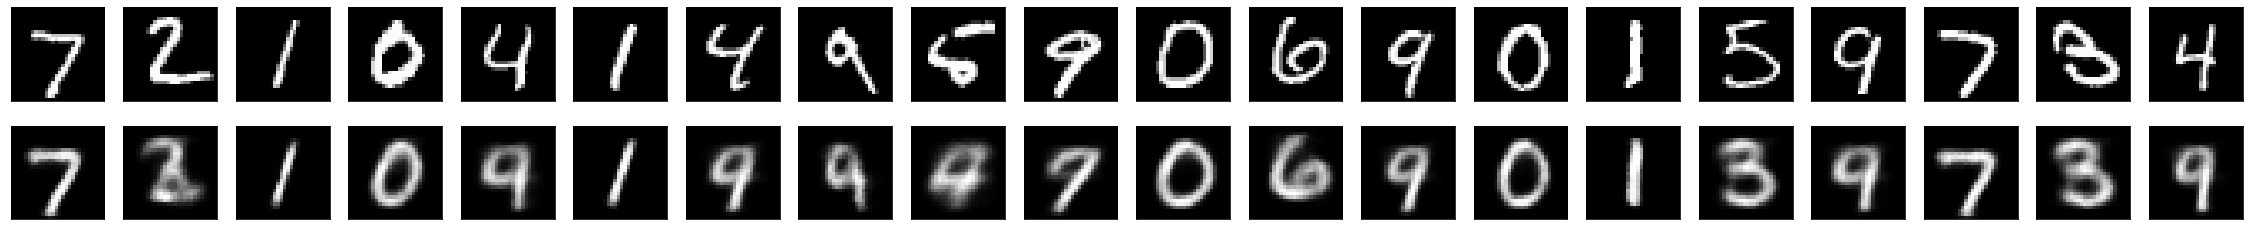

Epoch 1/100
235/235 [==============================] - 3s 13ms/step - loss: 0.3525 - val_loss: 0.2631
Epoch 2/100
235/235 [==============================] - 3s 14ms/step - loss: 0.2578 - val_loss: 0.2547
Epoch 3/100
235/235 [==============================] - 5s 22ms/step - loss: 0.2484 - val_loss: 0.2412
Epoch 4/100
235/235 [==============================] - 3s 14ms/step - loss: 0.2383 - val_loss: 0.2331
Epoch 5/100
235/235 [==============================] - 3s 15ms/step - loss: 0.2275 - val_loss: 0.2219
Epoch 6/100
235/235 [==============================] - 4s 15ms/step - loss: 0.2214 - val_loss: 0.2176
Epoch 7/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2172 - val_loss: 0.2134
Epoch 8/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2098 - val_loss: 0.2036
Epoch 9/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1978 - val_loss: 0.1942
Epoch 10/100
235/235 [==============================] - 3s 14ms/step - loss: 0.189

235/235 [==============================] - 4s 18ms/step - loss: 0.1287 - val_loss: 0.1292
Epoch 81/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1283 - val_loss: 0.1292
Epoch 82/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1278 - val_loss: 0.1278
Epoch 83/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1276 - val_loss: 0.1268
Epoch 84/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1272 - val_loss: 0.1263
Epoch 85/100
235/235 [==============================] - 5s 23ms/step - loss: 0.1271 - val_loss: 0.1272
Epoch 86/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1267 - val_loss: 0.1266
Epoch 87/100
235/235 [==============================] - 8s 32ms/step - loss: 0.1265 - val_loss: 0.1260
Epoch 88/100
235/235 [==============================] - 9s 38ms/step - loss: 0.1262 - val_loss: 0.1263
Epoch 89/100
235/235 [==============================] - 8s 34ms/step - loss: 0.1260 - 

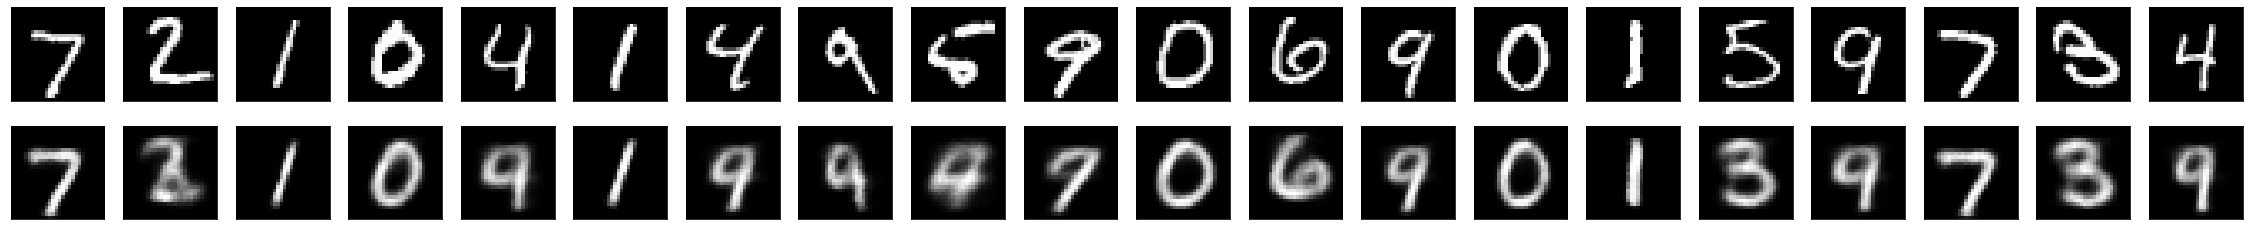

Epoch 1/100
235/235 [==============================] - 4s 17ms/step - loss: 0.3391 - val_loss: 0.2640
Epoch 2/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2582 - val_loss: 0.2525
Epoch 3/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2431 - val_loss: 0.2356
Epoch 4/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2293 - val_loss: 0.2254
Epoch 5/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2223 - val_loss: 0.2169
Epoch 6/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2075 - val_loss: 0.1977
Epoch 7/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1934 - val_loss: 0.1882
Epoch 8/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1859 - val_loss: 0.1820
Epoch 9/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1802 - val_loss: 0.1769
Epoch 10/100
235/235 [==============================] - 4s 19ms/step - loss: 0.175

235/235 [==============================] - 5s 19ms/step - loss: 0.1205 - val_loss: 0.1194
Epoch 81/100
235/235 [==============================] - 5s 19ms/step - loss: 0.1204 - val_loss: 0.1193
Epoch 82/100
235/235 [==============================] - 7s 30ms/step - loss: 0.1202 - val_loss: 0.1198
Epoch 83/100
235/235 [==============================] - 7s 31ms/step - loss: 0.1200 - val_loss: 0.1193
Epoch 84/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1197 - val_loss: 0.1186
Epoch 85/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1197 - val_loss: 0.1205
Epoch 86/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1194 - val_loss: 0.1189
Epoch 87/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1191 - val_loss: 0.1205
Epoch 88/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1192 - val_loss: 0.1197
Epoch 89/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1189 - 

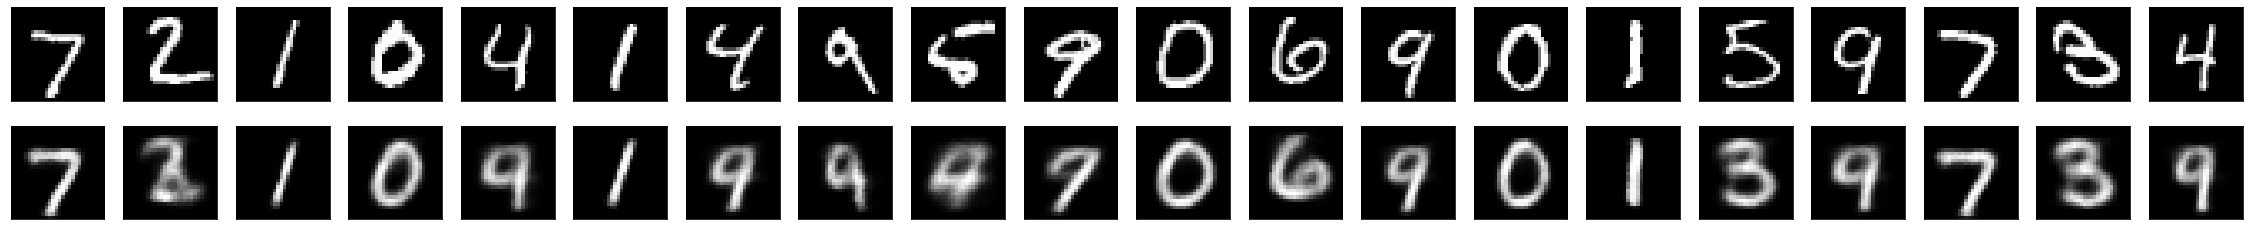

Epoch 1/100
235/235 [==============================] - 10s 35ms/step - loss: 0.3191 - val_loss: 0.2627
Epoch 2/100
235/235 [==============================] - 5s 22ms/step - loss: 0.2572 - val_loss: 0.2511
Epoch 3/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2402 - val_loss: 0.2297
Epoch 4/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2254 - val_loss: 0.2208
Epoch 5/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2183 - val_loss: 0.2121
Epoch 6/100
235/235 [==============================] - 4s 19ms/step - loss: 0.2037 - val_loss: 0.1957
Epoch 7/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1922 - val_loss: 0.1891
Epoch 8/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1841 - val_loss: 0.1791
Epoch 9/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1778 - val_loss: 0.1729
Epoch 10/100
235/235 [==============================] - 4s 15ms/step - loss: 0.17

235/235 [==============================] - 4s 17ms/step - loss: 0.1214 - val_loss: 0.1209
Epoch 81/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1213 - val_loss: 0.1208
Epoch 82/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1210 - val_loss: 0.1212
Epoch 83/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1209 - val_loss: 0.1203
Epoch 84/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1206 - val_loss: 0.1199
Epoch 85/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1205 - val_loss: 0.1205
Epoch 86/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1202 - val_loss: 0.1202
Epoch 87/100
235/235 [==============================] - 5s 19ms/step - loss: 0.1201 - val_loss: 0.1205
Epoch 88/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1199 - val_loss: 0.1200
Epoch 89/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1197 - 

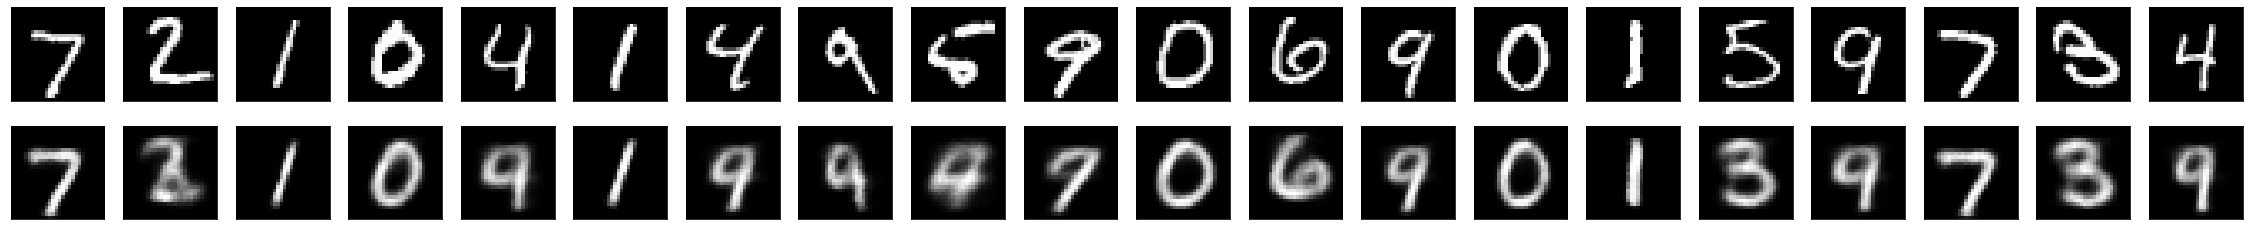

Epoch 1/100
235/235 [==============================] - 5s 18ms/step - loss: 0.3428 - val_loss: 0.2616
Epoch 2/100
235/235 [==============================] - 4s 19ms/step - loss: 0.2512 - val_loss: 0.2376
Epoch 3/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2275 - val_loss: 0.2183
Epoch 4/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2115 - val_loss: 0.2055
Epoch 5/100
235/235 [==============================] - 7s 30ms/step - loss: 0.1977 - val_loss: 0.1911
Epoch 6/100
235/235 [==============================] - 7s 31ms/step - loss: 0.1878 - val_loss: 0.1827
Epoch 7/100
235/235 [==============================] - 10s 43ms/step - loss: 0.1796 - val_loss: 0.1751
Epoch 8/100
235/235 [==============================] - 8s 34ms/step - loss: 0.1729 - val_loss: 0.1677
Epoch 9/100
235/235 [==============================] - 7s 29ms/step - loss: 0.1670 - val_loss: 0.1635
Epoch 10/100
235/235 [==============================] - 8s 32ms/step - loss: 0.16

235/235 [==============================] - 4s 17ms/step - loss: 0.1102 - val_loss: 0.1098
Epoch 81/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1101 - val_loss: 0.1092
Epoch 82/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1098 - val_loss: 0.1092
Epoch 83/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1098 - val_loss: 0.1101
Epoch 84/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1097 - val_loss: 0.1086
Epoch 85/100
235/235 [==============================] - 5s 19ms/step - loss: 0.1094 - val_loss: 0.1086
Epoch 86/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1093 - val_loss: 0.1082
Epoch 87/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1092 - val_loss: 0.1087
Epoch 88/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1091 - val_loss: 0.1093
Epoch 89/100
235/235 [==============================] - 5s 23ms/step - loss: 0.1089 - 

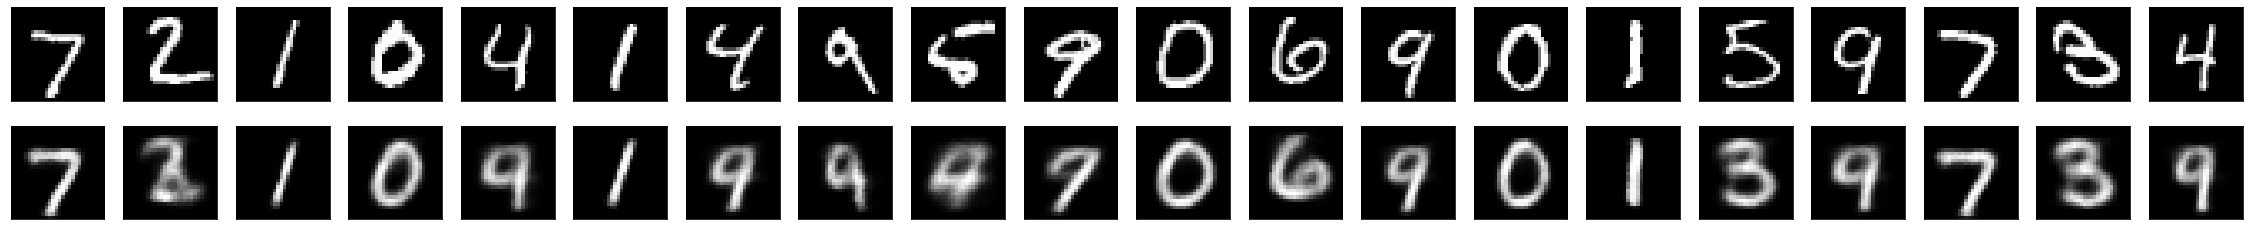

Epoch 1/100
235/235 [==============================] - 5s 18ms/step - loss: 0.3332 - val_loss: 0.2632
Epoch 2/100
235/235 [==============================] - 3s 14ms/step - loss: 0.2557 - val_loss: 0.2484
Epoch 3/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2343 - val_loss: 0.2242
Epoch 4/100
235/235 [==============================] - 4s 19ms/step - loss: 0.2183 - val_loss: 0.2114
Epoch 5/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2049 - val_loss: 0.1998
Epoch 6/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1943 - val_loss: 0.1880
Epoch 7/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1863 - val_loss: 0.1832
Epoch 8/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1803 - val_loss: 0.1777
Epoch 9/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1736 - val_loss: 0.1698
Epoch 10/100
235/235 [==============================] - 4s 18ms/step - loss: 0.167

235/235 [==============================] - 3s 14ms/step - loss: 0.1109 - val_loss: 0.1097
Epoch 81/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1108 - val_loss: 0.1098
Epoch 82/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1106 - val_loss: 0.1113
Epoch 83/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1104 - val_loss: 0.1111
Epoch 84/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1103 - val_loss: 0.1087
Epoch 85/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1100 - val_loss: 0.1088
Epoch 86/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1099 - val_loss: 0.1099
Epoch 87/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1098 - val_loss: 0.1094
Epoch 88/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1096 - val_loss: 0.1093
Epoch 89/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1094 - 

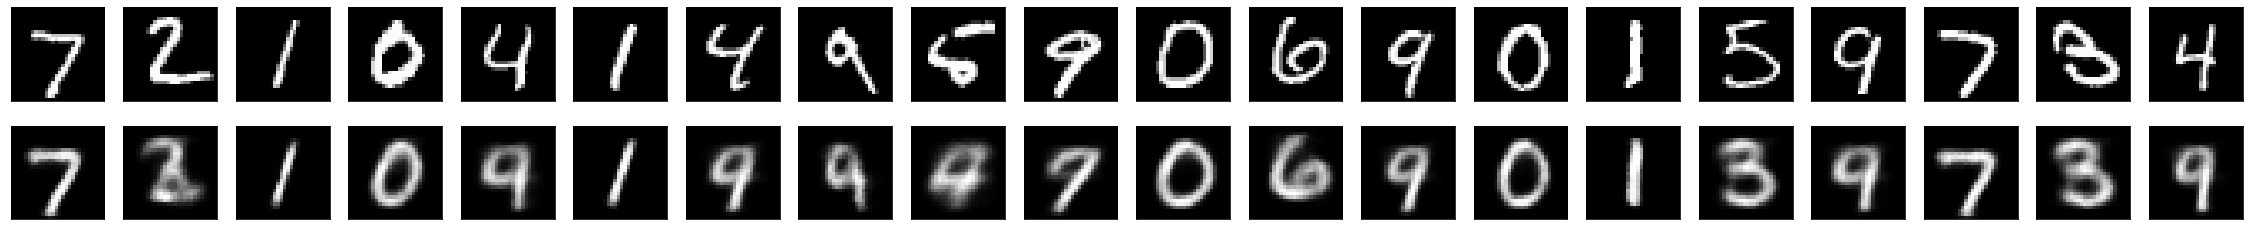

In [63]:
losses = []
dimensions = range(2, 18, 2)
n = 20

encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

for encoding_dim in dimensions:
    
    x = input_img = Input(shape = (784,))
    x = Dense(256, activation = 'relu')(x)
    x = Dense(128, activation = 'relu')(x)
    encoded = Dense(encoding_dim, activation = 'relu')(x)

    x = Dense(128, activation = 'relu')(encoded)
    x = Dense(256, activation = 'relu')(x)
    decoded = Dense(784, activation = 'sigmoid')(x)

    autoencoder = Model(input_img, decoded)

    encoder = Model(input_img, encoded)

    encoded_input = Input(shape = (encoding_dim,))
    
    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]

    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    
    autoencoder.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 1), loss = 'binary_crossentropy')
    
    model = autoencoder.fit(xtrain, xtrain,
                epochs = 100,
                batch_size = 256,
                shuffle = True,
                validation_data = (xtest, xtest),
                callbacks = [TensorBoard(log_dir = '/tmp/autoencoder')])
    
    plt.figure(figsize = (40, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(xtest[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
    loss = np.min(model.history["loss"])
    losses.append(loss)

In [64]:
losses

[0.1899096816778183,
 0.15257355570793152,
 0.14351975917816162,
 0.1240249052643776,
 0.11731608957052231,
 0.11733926087617874,
 0.1075451523065567,
 0.10796032845973969]

In [65]:
dimensions = np.asarray(range(2, 18, 2))
losses = np.asarray(losses)

In [75]:
dimensions.shape, losses.shape

((8,), (8,))

In [67]:
encoded_imgs

array([[ 7.219671 , 30.868376 , 21.55842  ,  0.       ],
       [13.385839 ,  8.703818 , 12.454264 ,  0.       ],
       [17.965294 , 19.518785 , 39.039093 ,  0.       ],
       ...,
       [ 5.9042044, 12.625751 , 14.847687 ,  0.       ],
       [ 2.6904387,  3.6062627,  9.06282  ,  0.       ],
       [21.825836 , 15.343994 , 11.226039 ,  0.       ]], dtype=float32)

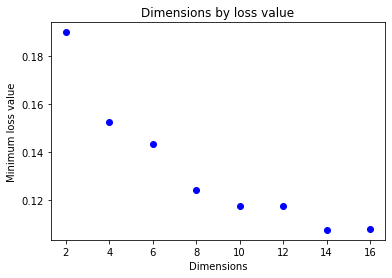

In [70]:
plt.scatter(dimensions, losses, c = "blue")
plt.title("Dimensions by loss value")
plt.xlabel("Dimensions")
plt.ylabel("Minimum loss value")
plt.show()



2. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

Print a few noisy images along with the output images to show they don't have noise.

In [71]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [72]:
encoding_dim = 8 

x = input_img = Input(shape = (784,))

x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
encoded = Dense(encoding_dim, activation = 'relu')(x)

x = Dense(128, activation = 'relu')(encoded)
x = Dense(256, activation = 'relu')(x)
decoded = Dense(784, activation = 'sigmoid')(x)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape = (encoding_dim,))

dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [73]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adadelta(learning_rate = 1), loss = 'binary_crossentropy')

In [77]:
autoencoder.fit(xtrain, xtrain,
                epochs = 100,
                batch_size = 256,
                shuffle = True,
                validation_data = (xtest, xtest),
                callbacks = [TensorBoard(log_dir = '/tmp/autoencoder')])

Epoch 1/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1220 - val_loss: 0.1226
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1219 - val_loss: 0.1221
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1218 - val_loss: 0.1214
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1217 - val_loss: 0.1222
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1215 - val_loss: 0.1207
Epoch 6/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1215 - val_loss: 0.1222
Epoch 7/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1214 - val_loss: 0.1208
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1212 - val_loss: 0.1210
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1211 - val_loss: 0.1213
Epoch 10/100
235/235 [==============================] - 3s 11ms/step - loss: 0.121

235/235 [==============================] - 2s 10ms/step - loss: 0.1162 - val_loss: 0.1169
Epoch 81/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1160 - val_loss: 0.1161
Epoch 82/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1159 - val_loss: 0.1171
Epoch 83/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1159 - val_loss: 0.1162
Epoch 84/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1159 - val_loss: 0.1173
Epoch 85/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1158 - val_loss: 0.1173
Epoch 86/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1157 - val_loss: 0.1163
Epoch 87/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1157 - val_loss: 0.1162
Epoch 88/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1156 - val_loss: 0.1166
Epoch 89/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1157 - 

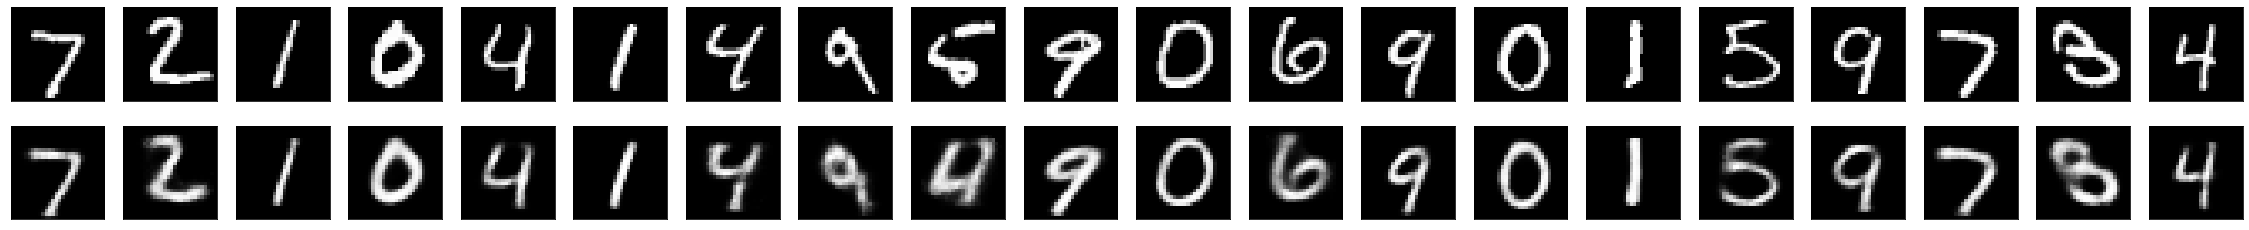

In [78]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20
plt.figure(figsize = (40, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [96]:
noise = np.random.normal(10, 5, (10000, 784))
noise_pred = autoencoder.predict(noise)

noise_preds.shape

(4, 784)

In [97]:
decoded_imgs.shape

(10000, 784)

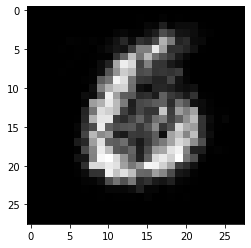

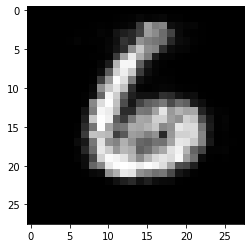

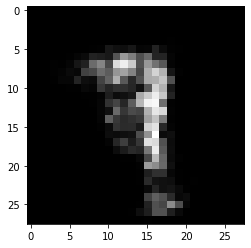

<Figure size 432x288 with 0 Axes>

In [98]:
# noisy images

for i in range(1, 4):
    plt.imshow(noise_preds[i].reshape(28, 28))
    plt.figure(i + 1)

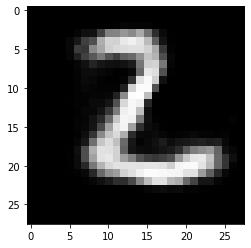

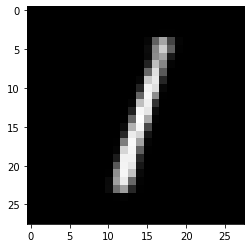

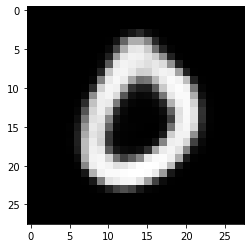

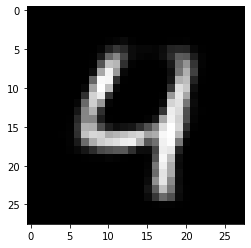

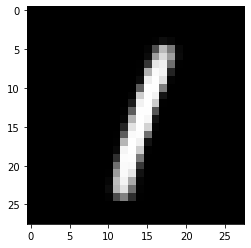

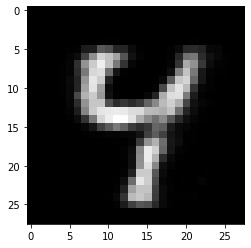

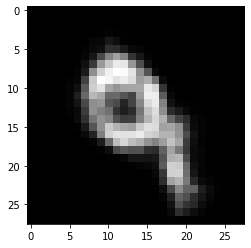

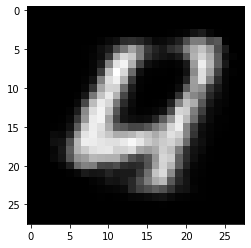

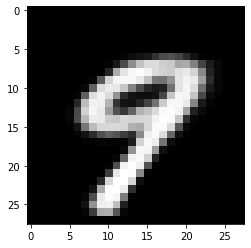

<Figure size 432x288 with 0 Axes>

In [99]:
# non noisy images

for i in range(1, 10):
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.figure(i + 1)